In [1]:
from datasets import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\prana\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Using Synthetic Data from datasets.py

In [2]:
dataset_size = 10000
num_regions = 5
num_demographics = 5
generator = SyntheticDataGenerator(dataset_size, num_regions, num_demographics)
X_total, weekly_hosp_rate, obs, delta_r = generator.simulate_dataset()

df = pd.DataFrame(X_total, columns=["time", "demographic", "region"])
df["weekly_hosp_rate"] = weekly_hosp_rate
df["observed"] = obs
df = df.sort_values(by='time')
print(df.head(10))

dem_df = pd.DataFrame(delta_r, columns=["dem_1", "dem_2", "dem_3", "dem_4", "dem_5"])
print("\n\n")
print(dem_df)

print("\n\nProportion Selected in Q: ", obs.mean())

      time  demographic  region  weekly_hosp_rate  observed
5059     2            0       0          0.000139      True
3108     4            3       3          0.000244      True
1495     5            2       0          0.000363      True
4900     9            0       0          0.001023      True
2180    10            1       3          0.001172     False
8108    11            1       1          0.001699      True
2564    12            4       3          0.001944      True
6011    12            4       2          0.000972     False
3423    12            0       2          0.000972     False
1248    13            0       2          0.001252     False



      dem_1     dem_2     dem_3     dem_4     dem_5
0  0.272288  0.003365  0.431122  0.130955  0.162270
1  0.124993  0.092705  0.470387  0.215162  0.096754
2  0.483610  0.089917  0.152345  0.029287  0.244841
3  0.190774  0.159920  0.041484  0.396334  0.211489
4  0.442943  0.167514  0.049481  0.054736  0.285326


Proportion Selected in 

Using Synthetic Data from Hybrid ODE (Zhi Cao)

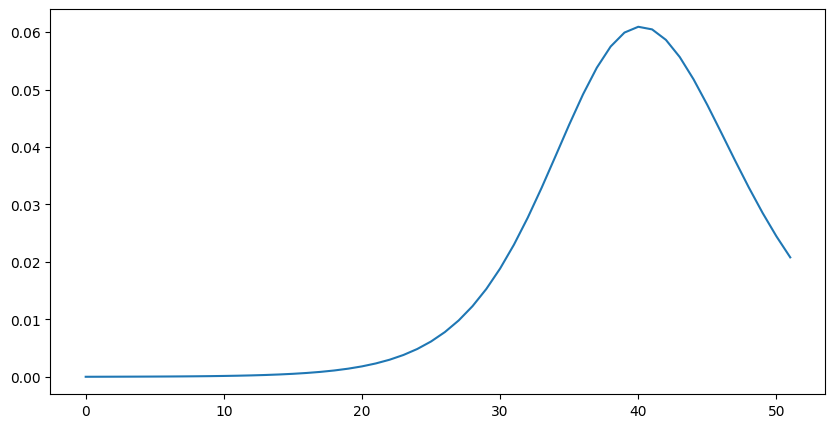

In [3]:
weekly_df = pd.read_csv("./hybridODE_weekly_data.csv")
rel_cols_df = weekly_df[["time", "beta", "Ca", "Infectious_mild", "Infectious_severe", "Hospitalized_recovered", "Hospitalized_deceased"]]

start = 0
timesteps = 52
end = start + timesteps

norm_sev = rel_cols_df["Infectious_severe"][start:end]/rel_cols_df["Infectious_severe"][start:end].sum()

plt.figure(figsize=(10, 5))
plt.plot(rel_cols_df["time"][start:end], norm_sev)
plt.show()